# Detecting Handwritten Digits Using Multilayer Perceptron
## --- Using Keras Sequential Model

## Import Libraries

In [1]:
#import libraries
import numpy as np
from numpy.random import seed
seed(888)

import idx2numpy
import matplotlib.pyplot as plt
import gzip

import tensorflow.compat.v1 as tf
from tensorflow.compat.v1 import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import TensorBoard, EarlyStopping
tf.set_random_seed(777)
import time
from time import strftime
import os
import itertools
from sklearn.metrics import confusion_matrix
%matplotlib inline

## Load Data

In [2]:
#import images
# training data 
train_img = gzip.open('train-images-idx3-ubyte.gz','r')
train_img_array = idx2numpy.convert_from_file(train_img)
# tseting data
test_img = gzip.open('t10k-images-idx3-ubyte.gz','r')
test_img_array = idx2numpy.convert_from_file(test_img)

In [3]:
# import labels
# train label data 
train_label = gzip.open('train-labels-idx1-ubyte.gz','r')
train_label_array = idx2numpy.convert_from_file(train_label)

#test label data
test_label = gzip.open('t10k-labels-idx1-ubyte.gz','r')
test_label_array = idx2numpy.convert_from_file(test_label)


## Data Exploration

In [4]:
train_img_array.shape

(60000, 28, 28)

In [5]:
test_img_array.shape

(10000, 28, 28)

In [6]:
type(train_img_array)

numpy.ndarray

In [7]:
train_label_array.shape

(60000,)

In [8]:
test_label_array.shape

(10000,)

In [9]:
#train image index 4 
train_img_array[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
# ****NEEDS TO BE COMMENTED OUT WHEN RUNNING MODEL. CAUSES KERNEL TO DIE*****
# display as an image
#plt.imshow(train_img_array [4], cmap=plt.cm.binary)

In [11]:
# test image index 0
test_img_array[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
#****NEEDS TO BE COMMENTED OUT WHEN FITTING MODEL. CAUSES KERNEL TO DIE*****
#display as an image
#plt.imshow(test_img_array [0], cmap=plt.cm.binary)

In [13]:
# train label index [1] -- matches with image of train image [4]
train_label_array[4]

9

In [14]:
# test label index [0] -- matches with the image of test image [0]
test_label_array[0]

7

## Data Preprocessing

### Set Constants

In [15]:
# number of data points - e.g. train data has 60,000 data points
NUM_TRAIN_DATA=train_img_array.shape[0]
NUM_TEST_DATA=test_img_array.shape[0]

# 28px*28px image = 784 dimensions 
DIMENSIONS=784
# 10 outputs from 0 to 9 is expected 
OUTPUT=10

### Image Data Preprocessing

In [16]:
# flatten train image data array into single dimension 
re_train_data=np.reshape(train_img_array, [NUM_TRAIN_DATA, DIMENSIONS])
re_train_data.shape

(60000, 784)

In [17]:
# flatten test image data array into single dimension 
re_test_data=np.reshape(test_img_array, [NUM_TEST_DATA, DIMENSIONS])
re_test_data.shape

(10000, 784)

In [18]:
# image data array is a number between 0 and 225. 0 = white, 255 = black, grey in between
# convert dat into digit between 0 and 1
train_data, test_data= re_train_data/255.0, re_test_data/255.0

### Label Data Preprocessing - one hot encoding

In [19]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [20]:
#convert lables to the format above, 10 because there are 0 to 9, i.e. 10 digits  
train_label=np.eye(10)[train_label_array]
test_label=np.eye(10)[test_label_array]

In [21]:
# indicates number 9 
train_label[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [22]:
# indicates number 7
test_label[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

## Set Up the Model

### Investigaet the Effect of Number of Neurons in Each Layer
#### -- Model 1 to 3 have different number of neurons in hidden layers.

In [23]:
# set up Model 1 

model1 = Sequential()
# Hidden layer 1 - number of neurons set at 2/3 of initial input of 784=DIMENSIONS  
model1.add(Dense(523, activation='relu',input_dim=DIMENSIONS, name='hidden-layer1'))
# Hidden layer 2 - number of neurons set at 2/3 of input from first layer of 523
model1.add(Dense(348, activation='relu',name='hidden-layer2'))
# Output layer - out put layer has 10 neurons indicating number 0 to 9 
model1.add(Dense(OUTPUT, activation='softmax',name='output-layer'))

# compile the model 
# set optimzer, loss 
model1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model1.summary()

# Param # = initial input 784 * first layer neurons 523 + bias 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden-layer1 (Dense)        (None, 523)               410555    
_________________________________________________________________
hidden-layer2 (Dense)        (None, 348)               182352    
_________________________________________________________________
output-layer (Dense)         (None, 10)                3490      
Total params: 596,397
Trainable params: 596,397
Non-trainable params: 0
_________________________________________________________________


## Model 2

In [25]:
# Set up Model 2 

model2=Sequential()
# Hidden layer 1 - # Input layer - number of neurons set at 1/3 of initial input of 784=DIMENSIONS  
model2.add(Dense(261, activation='relu',input_dim=DIMENSIONS, name='hidden-layer1'))
# Hidden layer 2 - # Input layer - number of neurons set at 1/3 of initial input of 261  
model2.add(Dense(87, activation='relu',name='hidden-layer2'))
# Output layer
model2.add(Dense(OUTPUT, activation='softmax',name='output-layer'))

# compile the model 
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden-layer1 (Dense)        (None, 261)               204885    
_________________________________________________________________
hidden-layer2 (Dense)        (None, 87)                22794     
_________________________________________________________________
output-layer (Dense)         (None, 10)                880       
Total params: 228,559
Trainable params: 228,559
Non-trainable params: 0
_________________________________________________________________


## Model 3

In [27]:
# Set up Model 3

model3=Sequential()
# Hidden layer 1 - number of neurons set at 1.5 * initial input of 784
model3.add(Dense(1176, activation='relu',input_dim=DIMENSIONS, name='hidden-layer1'))
# Hidden layer 2 - number of neurons set at 2/3 first layer input of 1176
model3.add(Dense(784, activation='relu',name='hidden-layer2'))
# Output layer
model3.add(Dense(OUTPUT, activation='softmax',name='output-layer'))

# compile the model 
model3.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden-layer1 (Dense)        (None, 1176)              923160    
_________________________________________________________________
hidden-layer2 (Dense)        (None, 784)               922768    
_________________________________________________________________
output-layer (Dense)         (None, 10)                7850      
Total params: 1,853,778
Trainable params: 1,853,778
Non-trainable params: 0
_________________________________________________________________


## Enable Visualization with Tensorboard

In [29]:
LOG_DIR='tensorboard_logs/'


In [30]:
# Function to create a directory when models are trained. To be embedded into model.fit callback

def create_tensorboard(model_name): 
    folder_name=f'{model_name} @ {strftime("%D %H %M")}'
    dir_path=os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_path)
    except OSError as e:
        print(e.strerror)
    else:
        print('Created directory')
    
    return TensorBoard(log_dir=dir_path)

## Fit the Model

In [31]:
# Set batch size and Epoch
datapoints_per_batch=1000
num_epochs=30

In [32]:
# Train Model 1 
model1.fit(train_data, train_label, validation_split=0.2, batch_size=datapoints_per_batch,
          epochs=num_epochs, callbacks=[create_tensorboard('Model_1')], verbose=0)

Created directory


In [33]:
# Train Model 2
model2.fit(train_data, train_label, validation_split=0.2, batch_size=datapoints_per_batch,
          epochs=num_epochs, callbacks=[create_tensorboard('Model_2')], verbose=0)

Created directory


In [34]:
# Train Model 3
model3.fit(train_data, train_label, validation_split=0.2, batch_size=datapoints_per_batch,
          epochs=num_epochs, callbacks=[create_tensorboard('Model_3')], verbose=0)

Created directory


## Regularization - Preventing Overfitting
### -- Dropout and Early Stopping 

In [35]:
# Set up model 4 - based on model3 but with dropout 

model4=Sequential()
# add dropout
model4.add(Dropout(0.2, seed=42, input_shape=(DIMENSIONS,)))
# Hidden layer 1 
model4.add(Dense(1176, activation='relu',name='hidden-layer1'))
# Hidden layer 2 
model4.add(Dense(784, activation='relu',name='hidden-layer2'))
# Output layer
model4.add(Dense(OUTPUT, activation='softmax',name='output-layer'))

# compile the model 
model4.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
hidden-layer1 (Dense)        (None, 1176)              923160    
_________________________________________________________________
hidden-layer2 (Dense)        (None, 784)               922768    
_________________________________________________________________
output-layer (Dense)         (None, 10)                7850      
Total params: 1,853,778
Trainable params: 1,853,778
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Embed Earlystopping 
earlystop = EarlyStopping(monitor='val_loss',patience=3)

model4.fit(train_data, train_label, validation_split=0.2, batch_size=datapoints_per_batch,
          epochs=num_epochs, callbacks=[earlystop, create_tensorboard('Model_4_D')], verbose=0)

Created directory


## Model Evaluation
### -- Based on Model 4 

### Predictions

In [38]:
# Predict one test data point 
np.set_printoptions(precision=1)
test=np.expand_dims(test_data[0], axis=0)
pred=model4.predict(test)
pred
# 7th index has highest probability = predicted digit is 7
# Below indicates an array of probabilites of image [0] being 0 ... 9. Sums up to 1.0 as a result of using softmax 

array([[4.4e-08, 5.9e-10, 5.6e-08, 4.0e-06, 1.7e-10, 3.2e-09, 9.6e-14,
        1.0e+00, 6.2e-08, 1.7e-05]], dtype=float32)

In [39]:
# Alternative way to display the prediction. Result equivalent to above
pred_class=np.argmax(pred,axis=1)
pred_class

array([7], dtype=int64)

In [40]:
# verify using test label data and first image in test data is 7 
test_label[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

### Loss and Accuracy

In [41]:
# Model 4 returns two metrics "loss" and "accuracy"
model4.metrics_names

['loss', 'accuracy']

In [42]:
# Display the loss and accuracy
test_loss, test_accuracy=model4.evaluate(test_data,test_label)
print(f'Model 4 has loss of {test_loss:0.3} and accuracy of {test_accuracy:0.2%}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0658 - accuracy: 0.9817
Model 4 has loss of 0.0658 and accuracy of 98.17%


### Confusion Matrix

In [43]:
model_pred=model4.predict(test_data)

In [44]:
model_pred

array([[4.4e-08, 5.9e-10, 5.6e-08, ..., 1.0e+00, 6.2e-08, 1.7e-05],
       [6.8e-12, 1.7e-08, 1.0e+00, ..., 7.0e-14, 8.4e-11, 1.5e-15],
       [2.1e-06, 1.0e+00, 2.9e-05, ..., 4.1e-05, 5.3e-05, 1.3e-06],
       ...,
       [4.1e-12, 5.4e-11, 5.2e-13, ..., 2.8e-09, 5.9e-08, 5.9e-07],
       [6.6e-10, 1.2e-12, 1.6e-12, ..., 5.0e-11, 6.3e-06, 1.2e-10],
       [8.7e-09, 2.1e-12, 2.1e-10, ..., 1.5e-16, 1.8e-11, 1.0e-12]],
      dtype=float32)

In [45]:
pred_class=np.argmax(model4.predict(test_data), axis=1)
pred_class

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [46]:
conf_matrix=confusion_matrix(y_true=test_label_array, y_pred=pred_class)

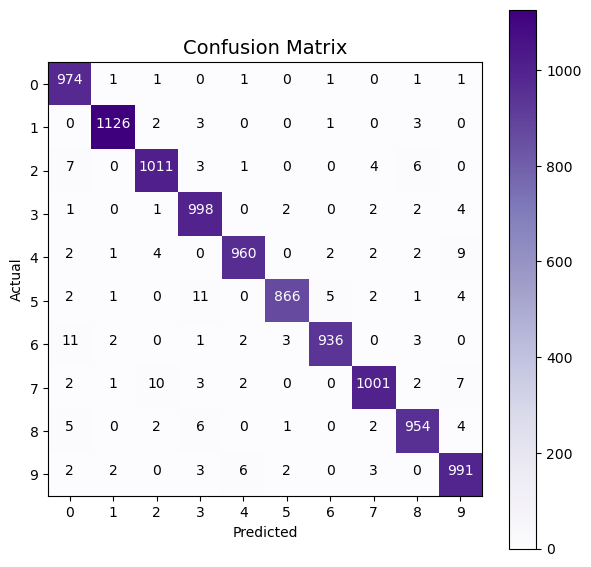

In [47]:
plt.figure(figsize=(7,7))
plt.imshow(conf_matrix, cmap=plt.cm.Purples)

plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('Actual', fontsize=10)
plt.xlabel('Predicted', fontsize=10)

plt.yticks(np.arange(0,10, step=1))
plt.xticks(np.arange(0,10, step=1))
plt.colorbar()

# display the values
for i, j in itertools.product(range(10), range(10)):
    plt.text(j, i, conf_matrix[i,j], horizontalalignment='center', 
            color='white' if conf_matrix[i,j]>800 else 'black')
# diagonal shows the true postives 
plt.show()

### Recall Score, Precision and F-Score

In [48]:
# Recall Score
true_pos=np.diag(conf_matrix)
recall_score=true_pos/np.sum(conf_matrix, axis=1)  #sum the rows

for i in itertools.product(range(10)):
    print(f'Recall Score for {i} is: {recall_score[i]:0.3}')

Recall Score for (0,) is: 0.994
Recall Score for (1,) is: 0.992
Recall Score for (2,) is: 0.98
Recall Score for (3,) is: 0.988
Recall Score for (4,) is: 0.978
Recall Score for (5,) is: 0.971
Recall Score for (6,) is: 0.977
Recall Score for (7,) is: 0.974
Recall Score for (8,) is: 0.979
Recall Score for (9,) is: 0.982


In [49]:
# Precision 
precision=true_pos/np.sum(conf_matrix, axis=0)
for i in itertools.product(range(10)):
    print(f'Precision for {i} is: {precision[i]:0.3}')

Precision for (0,) is: 0.968
Precision for (1,) is: 0.993
Precision for (2,) is: 0.981
Precision for (3,) is: 0.971
Precision for (4,) is: 0.988
Precision for (5,) is: 0.991
Precision for (6,) is: 0.99
Precision for (7,) is: 0.985
Precision for (8,) is: 0.979
Precision for (9,) is: 0.972


In [50]:
# SUMMARY - MODEL Recall Score, Precision and F-Score
avg_recall_score=np.mean(recall_score)
print(f'Model 4 recall score is {avg_recall_score:0.2%},')

avg_precision=np.mean(precision)
print(f'\tprecision is {avg_precision:0.2%}')

f_score=2*(avg_precision*avg_recall_score)/(avg_precision+avg_recall_score)
print(f'\tF-Score is {f_score:0.2%}')


Model 4 recall score is 98.15%,
	precision is 98.18%
	F-Score is 98.16%


In [51]:
## END 